# PNI Math Tools 2017 -- Programming module -- Day 5

## Some Basic Numerical Analysis

Often, when we want to understand a system, we might only have access to a description of how it changes in time
\begin{align}
\frac{dx}{dt}= f(x)
\end{align}
Our goal is to find (or approximate, or simulate) a solution to this equation. In this case, the function

\begin{align}
y= x(t)
\end{align}

that satisfies the first expression (here, we seek a function $x(t)$ whose derivative is equal to a particular f(x)). This is a 1d dynamical system, and it represents a general expression of how a variable changes in time! 


### Let's step through an example

Imagine we have the following simple differential equation:
\begin{align}
\frac{dx}{dt} = -x
\end{align}

In this case, I am going to simply tell you the solution (it is known, and easily solvable, but that is for later in the course!)
\begin{align}
x(t) = \mathrm{e}^{-t}
\end{align}
And we can plot this solution.

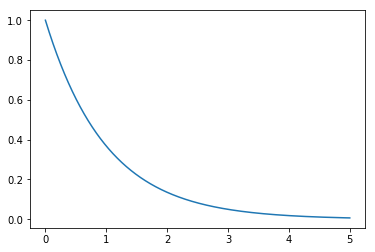

In [9]:
# show figures inline
%matplotlib inline
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy

tmax = 5
tstart = 0
dt = .001

t = np.arange(tstart,tmax,dt)


plt.plot(t,np.exp(-t))



### But lets say we didn't know the solution. We can use numerical analysis to approximation a solution.

Here, we use the **forward euler method** to approximate the solution. At each point in time, we examine the derivative (or slope), $\frac{dx}{dt}$ and step along in that direction by some small amount.

When approximating using this method, it is unclear what the **starting point** should be, so for now, we will provide it. This is also known as an *initial condition*.

Here, we will say the initial value of x is 1.

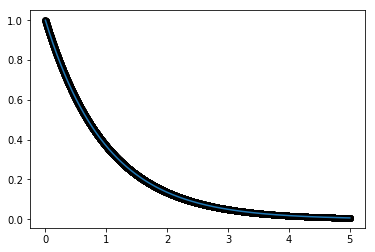

In [10]:
x_0 = 1 #set initial value to 1


appx_x = x_0 #the approximate value of x, this will change in time.  We start by setting it equal to the initial value

plt.figure()
for i in t:
    dx =  - appx_x * dt
    appx_x  = appx_x + dx
    plt.plot(i,appx_x, 'ko')

plt.plot(t,np.exp(-t))


### Our forward Euler method gave a good (but not perfect!) approximation to the true solution. There are other methods that are better than forward Euler, but for now we'll stick with this method

# Leaky Integrate-and-Fire Neuron

Here, we will use a real biological example of a differential equation we know, the *Leaky Integrate-and-Fire (LIF)* neuron, whose solution is not identifiable (we can't solve for it!). We will be using forward Euler to implement the simulation

This neuron model is defined by the *membrane equation* and *reset condition*:
\begin{align}
&\tau_m\,\frac{dV(t)}{dt} = E_{L} - V(t) + I(t) &\text{if }\quad V(t) \leq V_{th}\\
\\
\\
&V(t) = V_{r} &\text{otherwise}\\
\\
\end{align}
where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $I(t)$ is the pre-synaptic input current, $V_{th}$ is the firing threshold and $V_{r}$ is the reset voltage.

This equation is similar in format to the example above, simply with some added constant!

We'll extract and visualize the following quantities:

* Pre-synaptic input current(s) $I(t)$
* Membrane potential $V(t)$
* Output firing frequency 

The problem will be split in several steps:

* Forward integration without spikes
* Stochastic (noisy) pre-synaptic input
* Basic ensemble statistics
* Output spikes

**Step 1**

Initialize the main simulation variables.

We often start by defining all the relevant variables for the simulation

In [11]:
t_max = 100e-3    # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
i_mean = 25e-3   # ampere

print(t_max, dt, tau, el, vr, vth, i_mean)

0.1 0.001 0.02 -0.06 -0.07 -0.05 0.025


### Simulation without spikes

The numerical integration of the membrane equation can be performed in discrete time using the forward Euler method. We'll start by writing the membrane equation with some small $dt$ :


\begin{align*}
\tau_m\,\frac{V\left(t+dt\right)-V\left(t\right)}{dt} &= E_{L} - V(t) + \,I(t)
\end{align*}


The value of membrane potential $V\left(t+dt\right)$ can be expressed in terms of its previous value $V(t)$ by simple algebraic manipulation. For *small enough* values of $dt$ this provides a good approximation of the continuous time integration.

**Step 2**

Compute the values of $V(t)$ between $t=0$ and $t=0.1$ with $V(0)=E_L$ and pre-synaptic input given by:

$$
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
$$

**INSTRUCTIONS**
* Express $V\left(t+d t\right)$ in terms of $V(t)$
* Initialize the membrane potential variable `v` to $E_L$
* Loop in the time variable `t` from `t=0` to `t=t_max` with time step `dt`
* At each time step
    * Compute the current value of `i`
    * Update the value of `v`
    * Print `v`
* Use `np.pi` and `np.sin` for $\pi$ and $\sin(\,)$ respectively

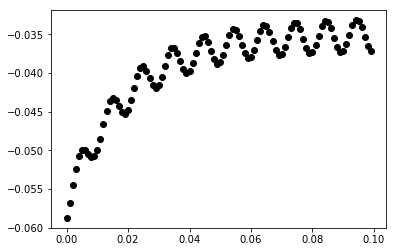

In [27]:
v = el
plt.figure()
t_max = 100e-3

for t in np.arange(0,t_max,dt):
    i  = i_mean*(1+np.sin(2*np.pi/.01*t))
    v = v + (el -v +i)*dt/tau
    
    plt.plot(t,v,'ko')



**Step 3**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ under the same conditions. Store this voltage trajectory as a long 1-d numpy array.

**INSTRUCTIONS**
* Update end time of loop
* Replace printing command with plotting command (with keyword `'ko'`)

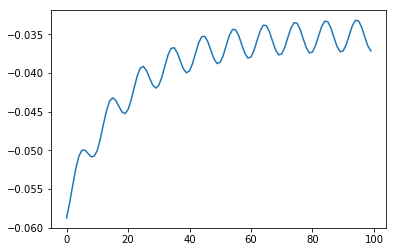

In [34]:
v = el 
vvec = np.zeros(int(t_max/dt))

for t in np.arange(0,t_max,dt):
    i  = i_mean*(1+np.sin(2*np.pi/.01*t))
    v +=  (el -v +i)*dt/tau
    vvec[int(t/dt)] = v
plt.plot(vvec)
    


## Stochastic pre-synaptic input

The pre-synaptic input received by neurons is random in nature. We'll replace the sinusoidal input from the previous exercise with a random input. A random pre-synaptic input results in a random time course $V(t)$ for each execution.

**Step 4**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ with random input where $I(t)$ is a random value between 0 and i_mean.

The function `random.seed()` initializes the random number generator and `random.random()` generates a sample between `0` and $I_{mean}$, given above.

**INSTRUCTIONS**
* use np.random.rand(1) to draw a single random value from 0 to 1
* Repeat the execution several times to verify that $V(t)$ has a random time course

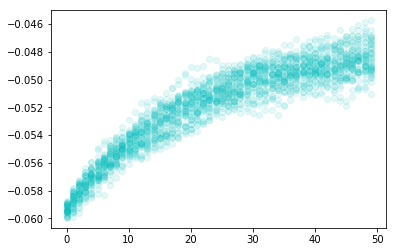

In [55]:

N = 40 #number of trajectories
t_max = .05
v = [el]*N
vvec = np.zeros([N,int(t_max/dt)])
plt.figure
for j in np.arange(N): #for every trajectory
    
    
    for t in np.arange(0,t_max,dt): #for every point in time
        
        ##everything in here is the same as above for a simulation for neuron j
        
        i  = i_mean*np.random.rand(1)
        
        v[j] +=  (el -v[j] +i)*dt/tau
        
        vvec[j,int(t/dt)] = v[j]
        
plt.plot(vvec.T, 'co', alpha = 0.1);
        
#plt.plot(vvec)


## Ensemble statistics

Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of $V(t)$. We'll collect the sample mean over $N$ realizations of $V(t)$  with random input in order to test such hypothesis. The sample mean, sample variance:

\begin{align}
\left\langle V(t_k)\right\rangle &=  \frac{1}{N} V(t_k)\\
\text{Var}\left(t_k\right) &= \frac{1}{N-1} \left(V(t_k)-\left\langle V(t_k)\right\rangle\right)^2
\end{align}

**Step 5**

Visualize `N=10` realizations.

**INSTRUCTIONS**
* At each timestep loop over `N` realizations of random input
* Plot each realization with keyword `'co'` and parameter `alpha=0.1`

In [ ]:

N = 10 #realizations
v=N*[el] #v is initialization for 10 trajectories
vvec = np.ones([int(t_max/dt),N])#trajectories of v for N realizations

    
    

**EXPECTED OUTPUT**
<img src="figures/lif_5.png">

**Step 6**

Plot the sample mean $\left\langle V(t)\right\rangle$ over `N=50` realizations.

**INSTRUCTIONS**
* Plot the sample mean at each timestep with keyword `'ko'`

In [ ]:
plt.figure()


#could also plot standard deviation!



**EXPECTED OUTPUT**
<img src="figures/lif_8.png">

## Output Spikes

The last step is to introduce the reset condition:
This neuron model is defined by the *membrane equation* and *reset condition*:

\begin{align}
V(t) &= V_{r} &\text{if }\quad V(t)\geq V_{th}
\end{align}

**STEP 9**

Insert the reset condition and collect the spiking times of each realization in a variable `spikes`.

**INSTRUCTIONS**
* Reset $V(t)$ to $V_r$ if $V(t)\geq V_{th}$ and collect the spike time
* Plot each realization with keyword `'co'` and parameter `alpha=0.05`
* Plot the sample mean with keyword `'ko'`
* Create a new figure and plot the spike times with keyword `'k|'`

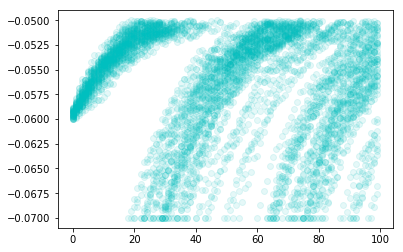

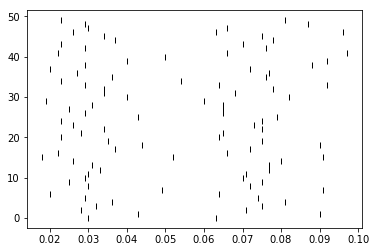

In [60]:

    
N = 50 #number of trajectories
t_max = .1
v = [el]*N
vvec = np.zeros([N,int(t_max/dt)])


plt.figure

d = [[]]*N

for j in np.arange(N): #for every trajectory
    
    
    for t in np.arange(0,t_max,dt): #for every point in time
        
        ##everything in here is the same as above for a simulation for neuron j
        
        i  = i_mean*np.random.rand(1)
        
        v[j] +=  (el -v[j] +i)*dt/tau
        
    
        if v[j] > vth:
            v[j] = vr
            d[j] = d[j] + [t] # append a list of spiketimes for neuron j
        vvec[j,int(t/dt)] = v[j]
        
plt.plot(vvec.T, 'co', alpha = 0.1);

plt.figure() #new figure
for i in np.arange(N): #plot each spike train 1 through N
    plt.plot(d[i][:], i*np.ones(np.size(d[i][:])),'k|')
    
    